In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
route_csv = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\생태통로.csv', encoding = 'cp949')
fence_csv = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\유도울타리.csv', encoding = 'cp949')
roadkill_csv = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\한국도로공사_로드킬 데이터 정보_20220630.csv', encoding = 'cp949')
roadkill2_csv = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\국립생태원_로드킬 정보시스템 로드킬 신고 현황_20201231.csv')
animal = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\국내 포유류 서식 분포_pre.csv', encoding = 'cp949')

In [3]:
animal.head(3)

,wkt_geom,SPCE_ID,EXAMIN_REA,SPCS_LCNM,SPCS_SCNCE,EXAMIN_YEA,EXAMIN_BEG,EXAMIN_END,longitude,latitude
0,215407.71410000044852495 406578.46749999932944775,9000000000553120,포유류,고라니,Hydropotes inermis,2017,2017-09-16,2017-09-16,127.171444,36.257028
1,215907.47499999962747097 422660.06469999998807907,9000000000553120,포유류,고라니,Hydropotes inermis,2017,2017-03-31,2017-03-31,127.177333,36.401944
2,215333.71580000035464764 425855.55189999938011169,9000000000553130,포유류,고라니,Hydropotes inermis,2017,2017-03-31,2017-03-31,127.171000,36.430750


In [4]:
animal.EXAMIN_REA.unique()

array(['포유류'], dtype=object)

In [5]:
animal.SPCS_LCNM.unique()

array(['고라니', '멧돼지', '족제비', '두더지', '다람쥐', '청설모', '오소리', '너구리', '고슴도치',
       '노루', '큰수염박쥐', '북방애기박쥐', '비단털쥐', '관코박쥐', '제주땃쥐', '우수리땃쥐', '멧토끼',
       '집박쥐', '양박쥐', '말사슴', '갈밭쥐', '등줄쥐', '멧밭쥐', '우수리박쥐', '뉴트리아', '큰집박쥐',
       '쇠윗수염박쥐', '큰발윗수염박쥐', '집쥐', '흰넓적다리붉은쥐', '작은땃쥐', '뒤쥐', '생쥐', '관박쥐',
       '안주애기박쥐', '대륙밭쥐', '문둥이박쥐', '흰배윗수염박쥐', '대륙쇠큰수염박쥐', '돌고래'],
      dtype=object)

In [6]:
# 필요없는 컬럼 드랍
columns_to_drop = ['wkt_geom', 'SPCE_ID', 'SPCS_SCNCE', 'EXAMIN_YEA', 'EXAMIN_BEG', 'EXAMIN_END']
animal_df = animal.drop(columns=columns_to_drop, axis=1)

In [7]:
animal_df.head(3)

,EXAMIN_REA,SPCS_LCNM,longitude,latitude
0,포유류,고라니,127.171444,36.257028
1,포유류,고라니,127.177333,36.401944
2,포유류,고라니,127.171000,36.430750


In [8]:
shp_path = 'G:\\내 드라이브\\공모전1\\데이터\\도로경계_선\\N3L_A0010000_A.shp'
gdf = gpd.read_file(shp_path)

In [9]:
import folium
from folium.plugins import MarkerCluster

In [23]:
df_coordinates = animal_df[['longitude', 'latitude']]

# 위도 경도 정보를 GeoDataFrame으로 변환
geometry = gpd.points_from_xy(df_coordinates['longitude'], df_coordinates['latitude'])
gdf_coordinates = gpd.GeoDataFrame(df_coordinates, geometry=geometry, crs=gdf.crs)

<Axes: >

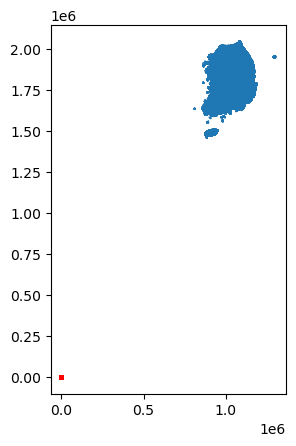

In [24]:
# 도로 경계선 맵핑
ax = gdf.plot()

# 위도 경도 정보 맵핑
gdf_coordinates.plot(ax=ax, color='red', marker='o', markersize=5)

In [25]:
plt.show()

In [1]:
import pandas as pd

In [4]:
asdf = pd.read_csv(r'G:\내 드라이브\공모전1\데이터\DSRC_구간통행속도_5분_1개월_202312', encoding = 'cp949')

In [5]:
asdf.head()

,집계일자,집계시분,콘존ID,DSRC차종유형구분코드,평균속도,Unnamed: 5
0,2023-12-01,00:00,0010CZE005,1,-1.00,NaN
1,2023-12-01,00:00,0010CZE005,2,-1.00,NaN
2,2023-12-01,00:00,0010CZE010,1,104.09,NaN
3,2023-12-01,00:00,0010CZE010,2,-1.00,NaN
4,2023-12-01,00:00,0010CZE011,1,88.52,NaN
